# Train and compare configurations

In [1]:
from medigraph.train_multiple_models import train_multiple_configurations as train
from medigraph.model.metrics import plot_metrics, analyze_metrics
from medigraph.utils import retrieve_metrics, get_table
from medigraph.data.properties import NORMALIZED_INPUTS, RFE_DIM_REDUCTION
RFE = RFE_DIM_REDUCTION
INP = NORMALIZED_INPUTS
from medigraph import root_dir
from pathlib import Path

import torch
%load_ext autoreload
%autoreload 2

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
n_epochs = 1000
features_selection = ["rfe", "normalized_inputs"]
models_list = ["Dense", "Single-h=16", "GCN-dr=0.1"]
output_folder = root_dir/"results"
assert output_folder.exists(), "Output folder does not exist"

In [ ]:
metric_dict = train(
    models_list=models_list,
    device=device,
    n_epochs=n_epochs,
    features_selection_list=features_selection,
    output_folder=output_folder
)

In [ ]:
res = analyze_metrics(
    metric_dict,
    plot_flag=True,
    figsize=(10, 10),
    title="Models performance comparison with regard to features selection"
)

# Report metrics as a latex table

### Influence of input features selection

In [3]:
metric_dict = retrieve_metrics(
    config_list=[
        ("Single-h=4", INP), ("Single-h=4", RFE),
        ("Single-h=16", INP), ("Single-h=16", RFE),
        ("Single-h=128", INP), ("Single-h=128", RFE),
        ("Dense", INP), ("Dense", RFE),
    ]
)

100%|██████████| 8/8 [00:15<00:00,  1.99s/it]


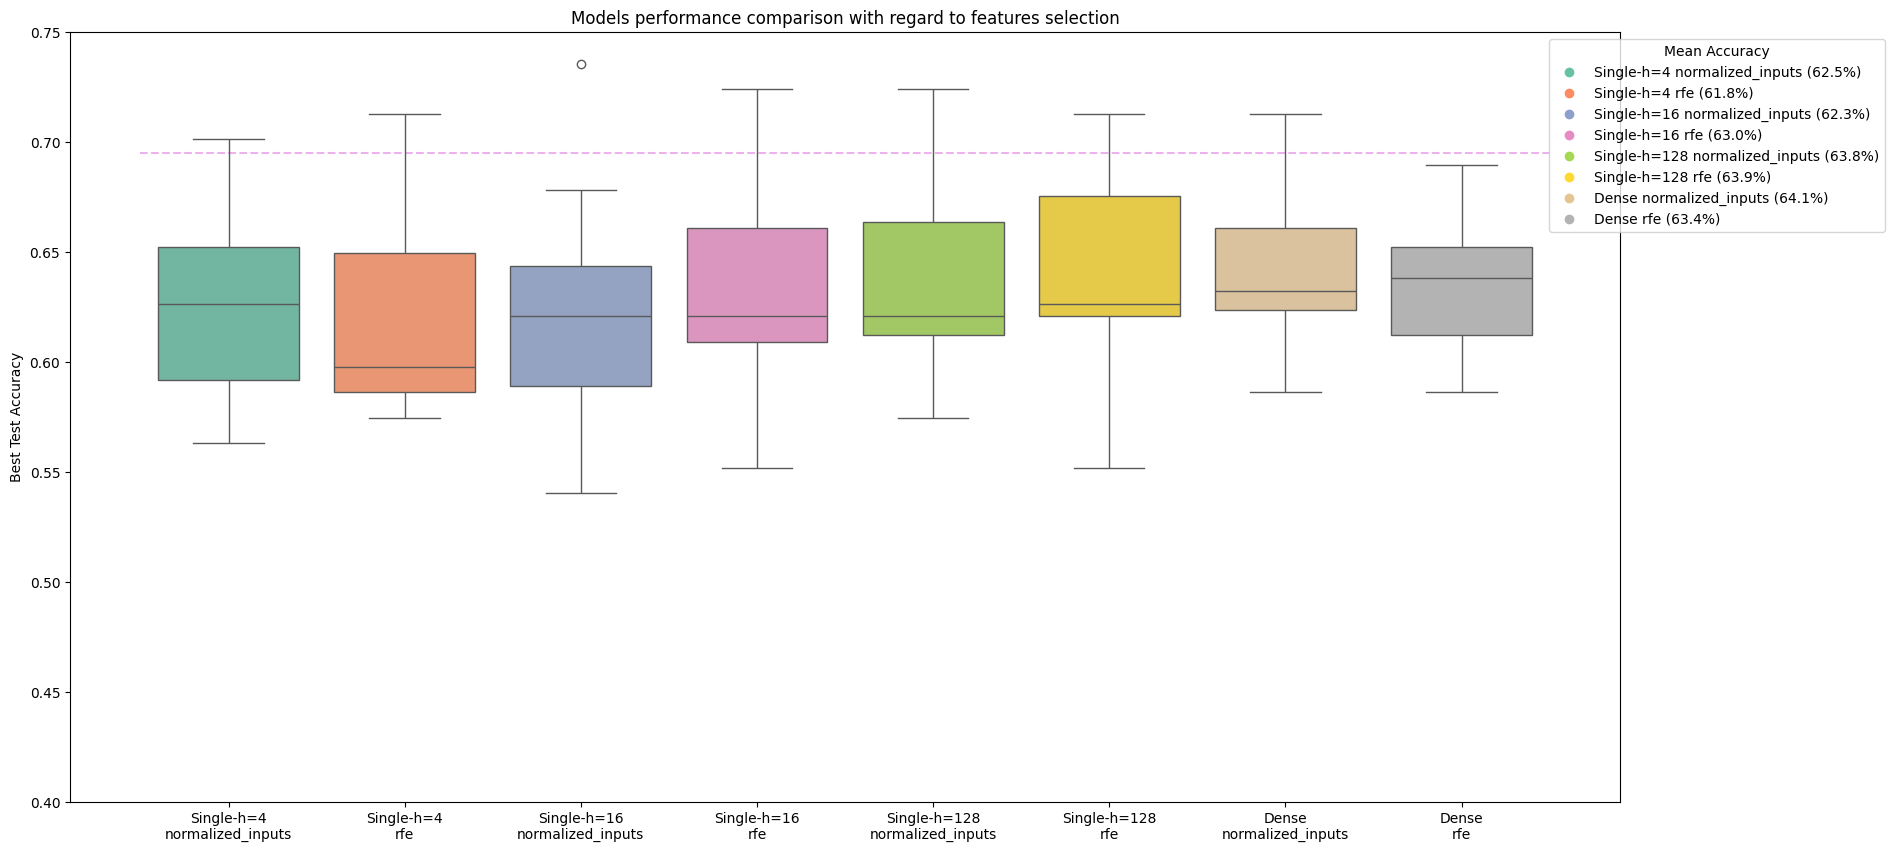

   Model            Feature        Test accuracy 
Single-h=4     normalized inputs   62.5 +/- 4.2\%
Single-h=4     rfe                 61.8 +/- 4.4\%
Single-h=16    normalized inputs   62.3 +/- 5.4\%
Single-h=16    rfe                 63.0 +/- 5.1\%
Single-h=128   normalized inputs   63.8 +/- 4.3\%
Single-h=128   rfe                 63.9 +/- 4.6\%
Dense          normalized inputs   64.1 +/- 3.4\%
Dense          rfe                 63.4 +/- 3.3\%
\begin{table}
	\begin{center}
		\begin{tabular}{lll}
			Model & Feature & Test accuracy \\
			\hline
			Single-h=4 & normalized inputs & 62.5 +/- 4.2\% \\
			Single-h=4 & rfe & 61.8 +/- 4.4\% \\
			Single-h=16 & normalized inputs & 62.3 +/- 5.4\% \\
			Single-h=16 & rfe & 63.0 +/- 5.1\% \\
			Single-h=128 & normalized inputs & 63.8 +/- 4.3\% \\
			Single-h=128 & rfe & 63.9 +/- 4.6\% \\
			Dense & normalized inputs & 64.1 +/- 3.4\% \\
			Dense & rfe & 63.4 +/- 3.3\% \\
		\end{tabular}
	\end{center}
	\caption{Models performances with regard to fe

In [4]:
res = analyze_metrics(
    metric_dict,
    plot_flag=True,
    figsize=(20, 10),
    title="Models performance comparison with regard to features selection"
)
get_table(res, caption="Models performances with regard to feature extraction method", table_label="dependance on feature extraction method")

# Influence of architecture

In [6]:
metric_dict = retrieve_metrics(
    config_list=[
        ("Single-h=4", RFE),
        ("Single-h=16", RFE),
        ("Single-h=128", RFE),
        ("Cheb-dr=0.3", RFE),
        ("Cheb-dr=0.1", RFE),
        ("Cheb-dr=0.0", RFE),
        ("Dense", RFE),
    ]
)

100%|██████████| 7/7 [00:13<00:00,  1.97s/it]


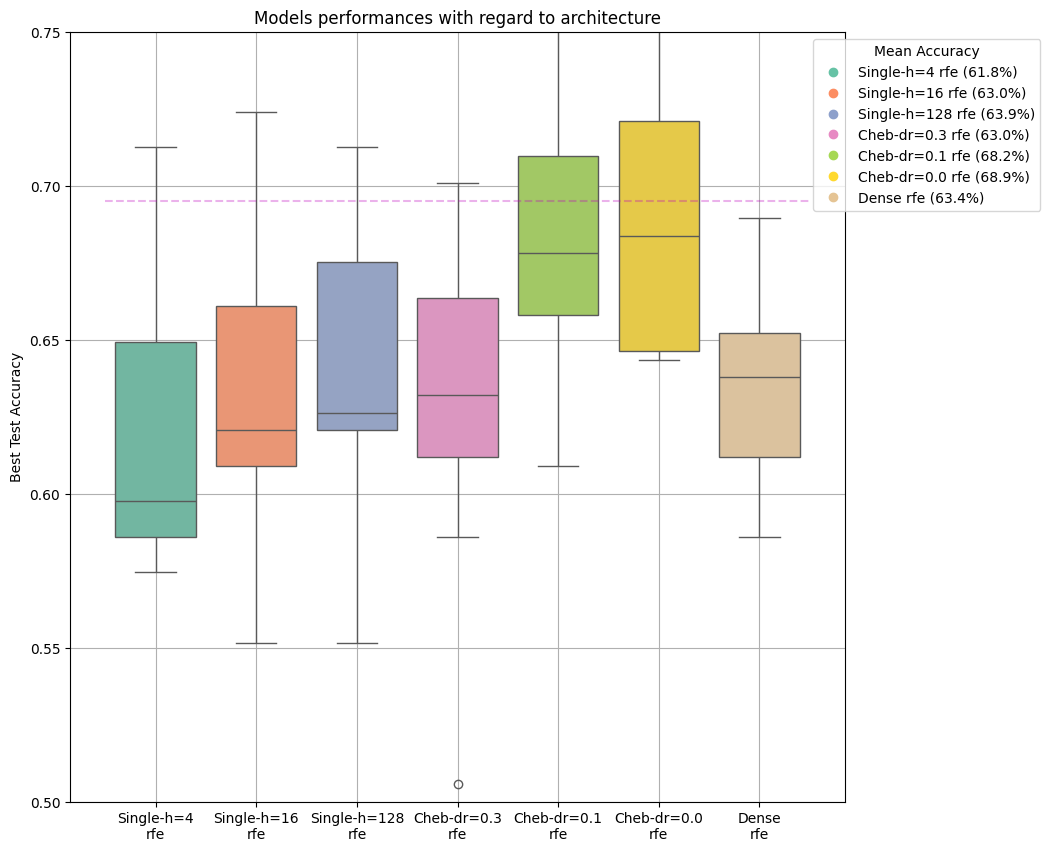

   Model       Feature   Test accuracy 
Single-h=4     rfe       61.8 +/- 4.4\%
Single-h=16    rfe       63.0 +/- 5.1\%
Single-h=128   rfe       63.9 +/- 4.6\%
Cheb-dr=0.3    rfe       63.0 +/- 5.4\%
Cheb-dr=0.1    rfe       68.2 +/- 4.0\%
Cheb-dr=0.0    rfe       68.9 +/- 4.0\%
Dense          rfe       63.4 +/- 3.3\%
\begin{table}
	\begin{center}
		\begin{tabular}{lll}
			Model & Feature & Test accuracy \\
			\hline
			Single-h=4 & rfe & 61.8 +/- 4.4\% \\
			Single-h=16 & rfe & 63.0 +/- 5.1\% \\
			Single-h=128 & rfe & 63.9 +/- 4.6\% \\
			Cheb-dr=0.3 & rfe & 63.0 +/- 5.4\% \\
			Cheb-dr=0.1 & rfe & 68.2 +/- 4.0\% \\
			Cheb-dr=0.0 & rfe & 68.9 +/- 4.0\% \\
			Dense & rfe & 63.4 +/- 3.3\% \\
		\end{tabular}
	\end{center}
	\caption{Models performances with regard to architecture}
	\label{table:dependance_on_architecture}
\end{table}


In [7]:
res = analyze_metrics(
    metric_dict,
    plot_flag=True,
    figsize=(10, 10),
    ylim=(0.5, 0.75),
    grid=True,
    title="Models performances with regard to architecture"
)
get_table(res, caption="Models performances with regard to architecture", table_label="dependance on architecture")

# Plot training metrics evolution across epochs

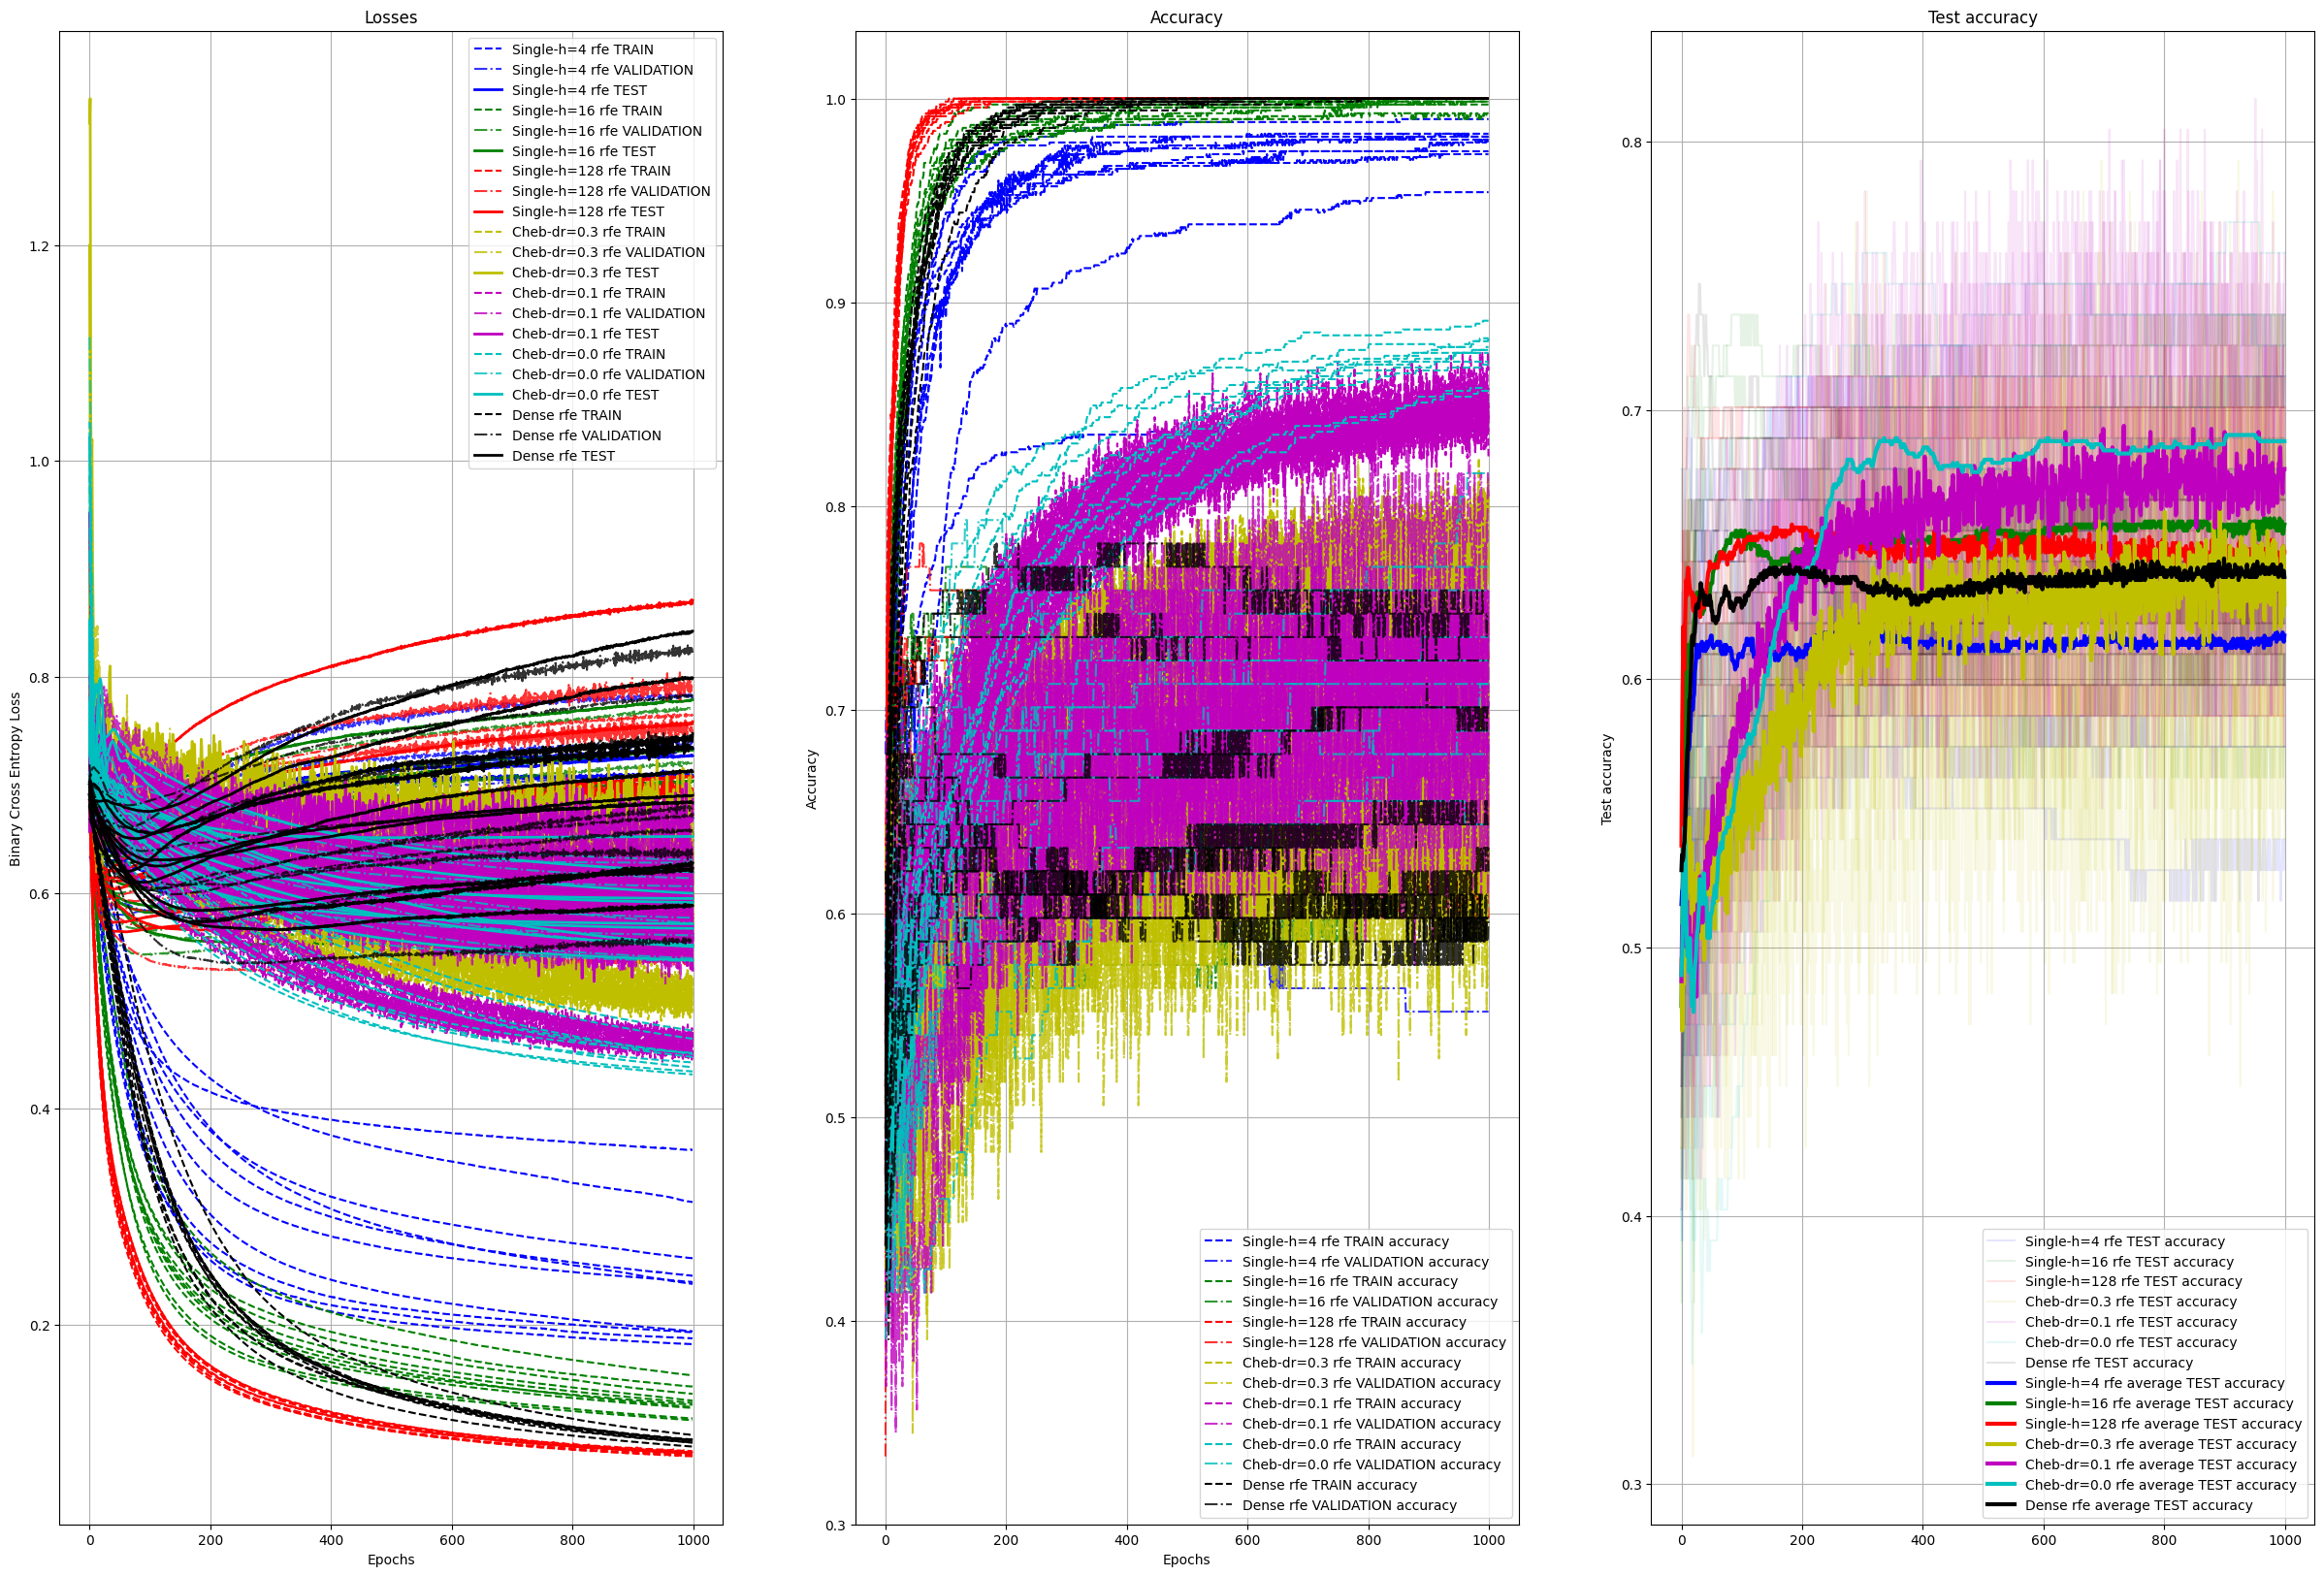

In [8]:
plot_metrics(metric_dict, figsize=(30, 20))